In [1]:
import numpy as np
import altair as alt
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
from tqdm import tqdm

In [2]:
rv = norm(loc=5, scale=1)

In [3]:
l = []
for x in tqdm(range(100)):

    vals = rv.rvs(size=4000)
    df = pd.DataFrame()
    df['vals'] = vals

    median = df['vals'].median()
    mu = df['vals'].mean()
    std = df['vals'].std()
   
    r = stats.norm.interval(0.5, loc=mu, scale=std/sqrt(4000))
    if (5 > r[0]) and (5<r[1]):
        l.append([mu, r[0], r[1], True])
    else:
        l.append([mu, r[0], r[1], False])
    

100%|██████████| 100/100 [00:00<00:00, 322.56it/s]


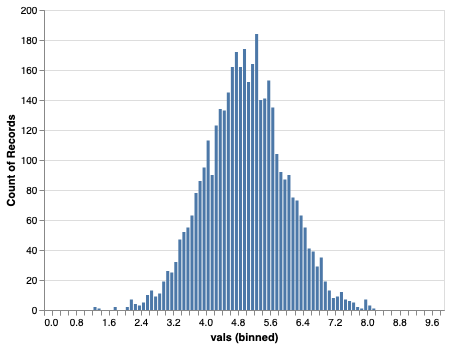

In [4]:
median = df['vals'].median()
mu = df['vals'].mean()
std = df['vals'].std()

alt.Chart(df).mark_bar().encode(
    alt.X("vals:Q", bin=alt.Bin(extent=[median - 5*std, median + 5*std], step=0.1)),
    alt.Y('count()'))

In [5]:
stats.norm.interval(0.5, loc=mu, scale=std/sqrt(4000))

(4.958952463679382, 4.979923698648263)

In [6]:
pd.Series(l).value_counts(normalize=True)

[5.0134521504328395, 5.002927551678369, 5.02397674918731, False]     0.01
[5.001768142345502, 4.991126306558901, 5.012409978132102, True]      0.01
[4.990800851372152, 4.980234944454311, 5.0013667582899926, True]     0.01
[5.0212235833874095, 5.010622757500686, 5.031824409274133, False]    0.01
[4.981154549022257, 4.9704573541720105, 4.991851743872504, False]    0.01
                                                                     ... 
[4.992587099677373, 4.9818070829272365, 5.00336711642751, True]      0.01
[5.008998336125484, 4.998202903026914, 5.019793769224054, True]      0.01
[4.988726313041703, 4.9781612397119295, 4.999291386371477, False]    0.01
[5.012276185631219, 5.00177118164113, 5.022781189621307, False]      0.01
[4.978552835296539, 4.967789046536637, 4.989316624056441, False]     0.01
Length: 100, dtype: float64

In [7]:
df = pd.DataFrame(l, columns = ['mu', 'c0', 'c1', 'in'])
df['point'] = df.index
df['rule'] = 5
df.head()

,mu,c0,c1,in,point,rule
0,5.023336,5.012633,5.034040,False,0,5
1,4.984048,4.973467,4.994628,False,1,5
2,5.004639,4.993879,5.015399,True,2,5
3,5.010253,4.999517,5.020989,True,3,5
4,5.000135,4.989446,5.010823,True,4,5


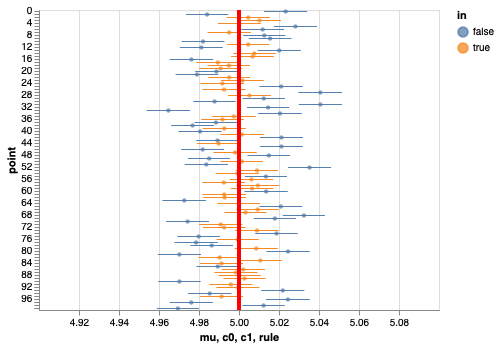

In [8]:
points = alt.Chart(df).mark_circle(size=20).encode(
    alt.X("mu:Q", scale=alt.Scale(domain=[4.9, 5.1])),
    alt.Y('point:O'),
    alt.Color('in'))

error_bars = points.mark_rule(size=0.5).encode(
    x='c0',
    x2='c1',
)

rule = alt.Chart(df).mark_rule(color='red', size=3).encode(
    x='rule'
)

(points + error_bars + rule).properties(height=300)

In [9]:
df['in'].value_counts()

False    52
True     48
Name: in, dtype: int64